# Задание 13. Поиск путей в графе

На рисунке — схема дорог, связывающих города А, Б, В, Г, Д, Е, Ж, З, И, К. По каждой дороге можно двигаться только в одном направлении, указанном стрелкой. Сколько существует различных путей из города А в город К?

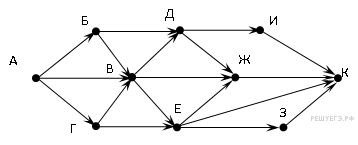

In [20]:
d = {
     'А': [],
     'Б': ['А'], 
     'В': ['А', 'Б', 'Г'], 
     'Г': ['А'],
     'Д': ['Б', 'В'],
     'Е': ['В'],
     'Ж': ['В', 'Д', 'Е'],
     'З': ['Е'],
     'И': ['Д'],
     'К': ['Е', 'Ж', 'З', 'И']
     }

labels = {'A': 1}

def get_label(node, d):
    if not d[node]:
        return 1
    label = 0
    for parent in d[node]:
        label += get_label(parent, d)
    return label

for node in d:
    print(node, get_label(node, d))


А 1
Б 1
В 3
Г 1
Д 4
Е 3
Ж 10
З 3
И 4
К 20


In [ ]:
def get_label(node, d, start_node=None):
    if node == start_node or (start_node is None and not d[node]):
        return 1
    label = 0
    for parent in d[node]:
        label += get_label(parent, d, start_node)
    return label

for node in d:
    print(node, get_label(node, d))

for node in d:
    print(node, get_label(node, d, 'Е'))

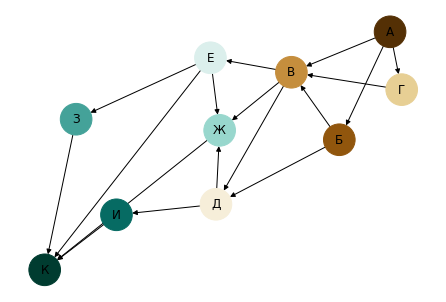

In [56]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph().to_directed()
for node in d:
    for parent in d[node]:
        G.add_edge(parent, node, weight=10, label=node)



pos = nx.layout.spring_layout(G)
nx.drawing.draw(G, pos, **{
    'node_size': 1000,
    "node_color": range(len(G)),
    "edge_color": "#000000",
    "width": 1,
    "edge_cmap": plt.cm.Blues,
    "with_labels": True,
    'cmap': plt.cm.BrBG
})


In [57]:
pos

{'А': array([0.8579823 , 0.26533565]),
 'Б': array([ 0.58489253, -0.01778602]),
 'В': array([0.32717194, 0.15920417]),
 'Г': array([0.92059375, 0.11362083]),
 'Д': array([-0.07870903, -0.18704328]),
 'Е': array([-0.1083499 ,  0.19720897]),
 'Ж': array([-0.0588002 ,  0.00690595]),
 'З': array([-0.83088421,  0.03604077]),
 'И': array([-0.61389717, -0.21460512]),
 'К': array([-1.        , -0.35888192])}

In [ ]:
print(nx.dijkstra_path(G,'А','К'))